In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from tabulate import tabulate
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# 1. Tauchen

# Parameters
n = 9                                                  # Number of grid points (given in the exercise)
m = 3                                                  # Scaling parameter (number of deviations covered)
rho = 0.99                                             # Persistence parameter (given in the exercise)
sigma = 0.007                                          # Standard deviation of epsilon (given in te exercise)

# Standard deviation of z
stdZ = sigma/np.sqrt((1-rho**2))

# Lower and upper bounds of the grid
lb = -m*stdZ                                           # Lower bound
ub = m*stdZ                                            # Upper bound

# Defining the n-1 possible states
Z = np.linspace(lb,ub,n)

# Transition matrix
z = (ub-lb)/(n-1)                                      # Width between gridpoints 
P = np.zeros((n, n))                                   # The matrix

# Loop for inserting values in P[i,j]
for i in range(n):    
    for j in range(n):

        up = (Z[j]-rho*Z[i]+z/2)/sigma            
        down = (Z[j]-rho*Z[i]-z/2)/sigma          

        if j==0:
            P[i,j] = norm.cdf(up)
        elif j==(n-1):                             
            P[i,j] = 1-norm.cdf(down)
        else:
            P[i,j] = norm.cdf(up)-norm.cdf(down)

In [3]:
# Printing:
print("\n Transition Matrix:\n")
print(tabulate(P))
print("\n")

# Check if rows sum to 1
for i in range(n):
    print ("Sum of row {0:}: {1:.6f} ".format(i+1,sum(P[i,])))
    
# The state space
print("\n")
print("\n State Space:\n")
print("\n".join("{}: {:.6f}".format(*i) for i in enumerate(Z)))

# Define the names for the Tauchen transition matrix and state space
PTauchen = P
ZTauchen = Z


 Transition Matrix:

------------  ------------  ------------  ------------  -----------  -----------  -----------  -----------  -----------
0.99277       0.00722976    4.21885e-15   0             0            0            0            0            0
0.00241767    0.991352      0.00623062    2.77556e-15   0            0            0            0            0
3.20542e-16   0.00284931    0.991795      0.00535575    1.77636e-15  0            0            0            0
6.36004e-41   4.95051e-16   0.00334927    0.992059      0.00459186   1.22125e-15  0            0            0
1.38039e-77   1.29624e-40   7.62438e-16   0.00392674    0.992147     0.00392674   7.77156e-16  0            0
3.02319e-126  3.71775e-77   2.63446e-40   1.17098e-15   0.00459186   0.992059     0.00334927   4.44089e-16  0
6.46715e-187  1.07648e-125  9.9847e-77    5.3392e-40    1.79343e-15  0.00535575   0.991795     0.00284931   3.33067e-16
1.32937e-259  3.04516e-186  3.82225e-125  2.67403e-76   1.07905e-39  2.73911e-

In [4]:
# 2. Rouwenhorst

# Standard deviation of z
stdZ = sigma/np.sqrt((1-rho**2))

# Value of p
p = (1+rho)/2

# Lower and upper bounds of the grid
lb = -np.sqrt(n-1)*stdZ                                # Lower bound
ub = np.sqrt(n-1)*stdZ                                 # Upper bound

# Defining the n-1 possible states
Z = np.linspace(lb,ub,n)

# Defining the recursion function for calculating P
def recursion(m):
    
    if m == 2:
        # Defining P_2
        P = np.array([[p, 1 - p], [1 - p, p]])

    else:
        # Creating the 4 matrices that appear in the sum of Rouwenhorst's Step 2
        p1 = np.zeros((m,m))
        p2 = np.zeros((m,m))
        p3 = np.zeros((m,m))
        p4 = np.zeros((m,m))

        # Calculate the matrix of the previous iteration (P_[n-1])
        prev = recursion(m-1)

        # Build up the 4 matrices
        p1[:m-1,:m-1] = p*prev
        p2[:m-1,1:] = (1-p)*prev
        p3[1:,:-1] = (1-p)*prev
        p4[1:,1:] = p*prev
        
        # Find the current matrix (P_n)
        P = p1 + p2 + p3 + p4
        
        # Dividing all but the top and bottom rows, so that the conditional probabilities add up to 1
        P[1:m-1,] = P[1:m-1,]/2

    return P

P = recursion(n)

In [5]:
# Printing:
print("\n Transition Matrix:\n")
print(tabulate(P))
print("\n")

# Check if rows sum to 1
for i in range(n):
    print ("Sum of row {0:}: {1:.6f} ".format(i+1,sum(P[i,])))
    
# The state space
print("\n")
print("\n State Space:\n")
print("\n".join("{}: {:.6f}".format(*i) for i in enumerate(Z)))

# Define the names for the Rouwenhorst transition matrix and state space
PRouwen = P
ZRouwen = Z


 Transition Matrix:

-----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------  -----------
0.960693     0.0386208    0.000679261  6.82674e-06  4.28815e-08  1.72388e-10  4.33136e-13  6.21875e-16  3.90625e-19
0.0048276    0.960863     0.0337958    0.000509467  4.26682e-06  2.14411e-08  6.46461e-11  1.08284e-13  7.77344e-17
2.42593e-05  0.00965594   0.960984     0.0289693    0.000363914  2.43821e-06  9.18909e-09  1.84703e-11  1.54691e-14
1.21906e-07  7.2781e-05   0.0144846    0.961057     0.0241417    0.000242612  1.21911e-06  3.06301e-09  3.07836e-12
6.12593e-10  4.87637e-07  0.000145566  0.0193133    0.961081     0.0193133    0.000145566  4.87637e-07  6.12593e-10
3.07836e-12  3.06301e-09  1.21911e-06  0.000242612  0.0241417    0.961057     0.0144846    7.2781e-05   1.21906e-07
1.54691e-14  1.84703e-11  9.18909e-09  2.43821e-06  0.000363914  0.0289693    0.960984     0.00965594   2.42593e-05
7.77344e-17  1.08284e-13  6.46461e-11  2.14411e-08

In [6]:
# 3. Simulate the processes

# Function for finding the next realization of a discrete process, given the transition matrix, the current state and a random draw
def nextZ(P,state,draw):      
 
    for j in range(len(P[state,])):                                 # Loop through every possible new state

        lb = norm.ppf(max(min(sum(P[state,:j]),1),0),scale=sigma)   # Lower bound for the draw to represent a transition to state j
        ub = norm.ppf(max(min(sum(P[state,:j+1]),1),0),scale=sigma) # Upper bound for the draw to represent a transition to state j
                
        if lb <= draw < ub:                                         # Check if the draw is in the interval corresponding to the conditional probability of state j
            return j                                                # If it is, then j is the new state
        
# Initial state for the discrete processes
initState = int((n-1)/2)                                            # The process starts at z_0 = 0

# Number of periods
t = 10000

# Define the array for the simulations
zTauchen = np.zeros(t)
zRouwen = np.zeros(t)
zContinuous = np.zeros(t)

# Loop
for i in range(t):
    draw = np.random.normal(0,sigma)                                # Random draw from standard normal distribution
    
    if i == 0:
        sTauchen = initState                                        # Starts at zero
        sRouwen = initState                                         # Starts at zero                 
        zContinuous[i] = 0                                          # Starts at zero
    else:
        sTauchen = nextZ(PTauchen,sTauchen,draw)                    # Next state for the Tauchen process
        sRouwen = nextZ(PRouwen,sRouwen,draw)                       # Next state for the Rouwenhorst process                 
        zContinuous[i] = rho*zContinuous[i-1] + draw                # Next value for the continuous process (from the initial value)
        
    zTauchen[i] = ZTauchen[sTauchen]
    zRouwen[i] = ZRouwen[sRouwen]   
    

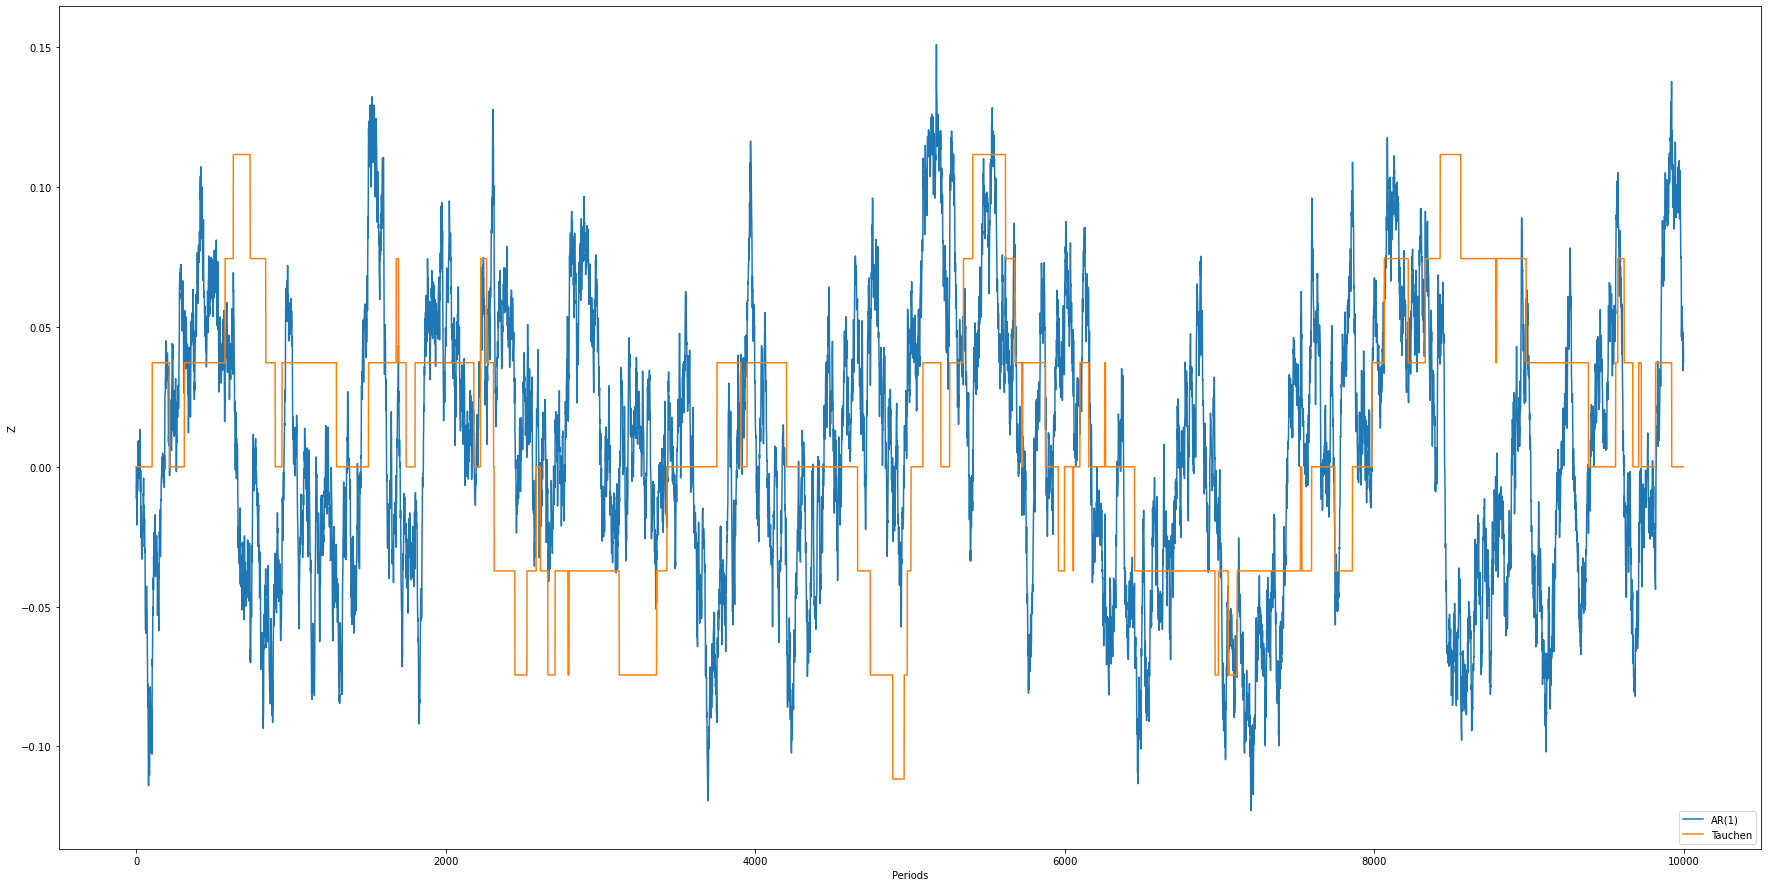

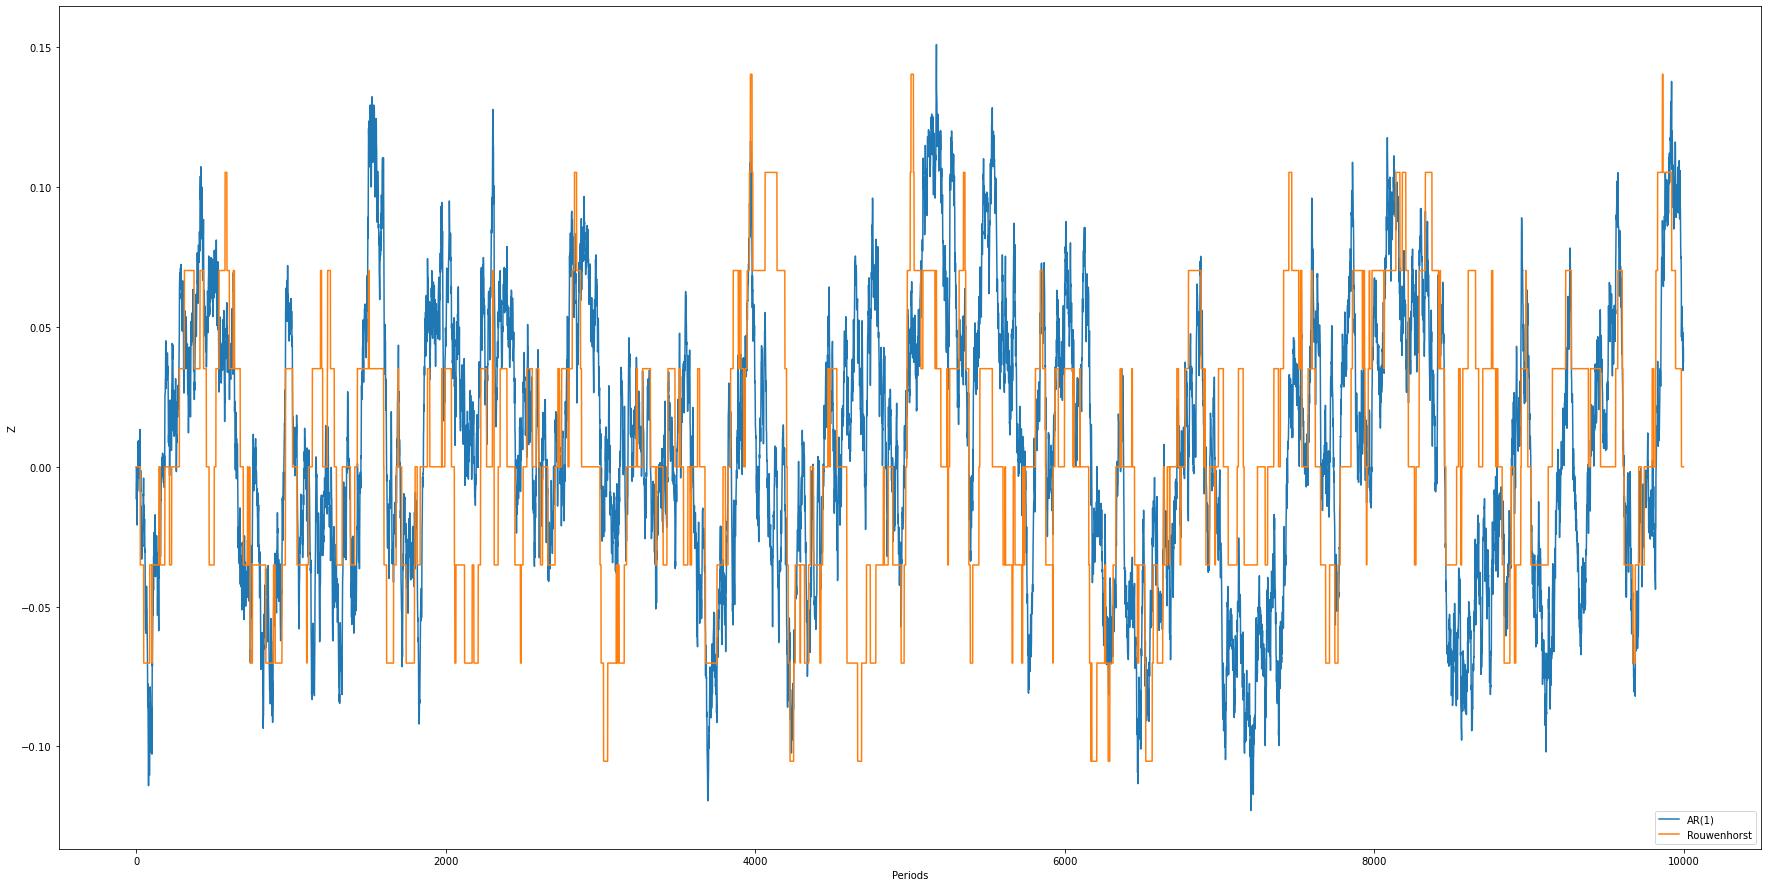

In [7]:
# Plotting the processes together

# Tauchen
fig = plt.gcf()
fig.set_size_inches(30.5, 15.5)
plt.plot(range(t),zContinuous,label="AR(1)")
plt.plot(range(t),zTauchen,label="Tauchen")
plt.legend(loc='lower right')
plt.xlabel('Periods')
plt.ylabel('Z')
plt.show()

# Rouwenhorst
fig = plt.gcf()
fig.set_size_inches(30.5, 15.5)
plt.plot(range(t),zContinuous,label="AR(1)")
plt.plot(range(t),zRouwen,label="Rouwenhorst")
plt.legend(loc='lower right')
plt.xlabel('Periods')
plt.ylabel('Z')
plt.show()

In [8]:
# 4. Estimate the AR(1) parameter rho based on simulated data

rhoHatCont = ARIMA(zContinuous,order=(1,0,0)).fit().params[1]
rhoHatTauchen = ARIMA(zTauchen,order=(1,0,0)).fit().params[1]
rhoHatRouwen = ARIMA(zRouwen,order=(1,0,0)).fit().params[1]

print(rhoHatCont, rhoHatTauchen, rhoHatRouwen)


0.9896629352234917 0.9971758917680476 0.9884380154255922
